# Pre-Data Collection

In [2]:

import pandas as pd
import os
import matplotlib.pyplot as plt

'''
The GTSRB Dataset is a collection of German traffic signs. This programm is a CNN to detect and classify
the signs.
'''

train_path = "//Users/soeren/Documents/Neuronale Netze/Signs/GTSRB-2/Final_Training/Images"
test_path = "/Users/soeren/Documents/Neuronale Netze/Signs/GTSRB/Final_Test/Images"

def list_all_elements_in_folder(folder):
    elements = os.listdir(folder)
    return elements
    
def all_elements_sorted_num_train(eles):
    """
    Sorts the train_folder numerically for GTSB Project
    """
    
    fehler = 0
    liste = []
    for i in range(len(eles) - 1): #one .DS_Store file - unnecessary
        liste.append(0)
    for element in eles:
        try:
            liste.insert(int(element), element)
            liste.pop(int(element) + 1)
        except:
            fehler += 1
            
    print("Fehler bei dem Laden: ", fehler)
        
    return liste
        
all_elements = all_elements_sorted_num_train(list_all_elements_in_folder(train_path))
print(all_elements)
print(len(os.listdir(train_path + '/' + all_elements[0])))

Fehler bei dem Laden:  1
['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']
212


# Data Collection: Mapping dictionary to source

In [3]:
import PIL
import glob
import matplotlib.pyplot as plt
from matplotlib import image as img
import numpy as np

#Speicherung: training_dict{Klasse als String: Element}


index = 0
training_dict = {}
valid_images = [".ppm"]
while index < len(all_elements):
    
    new_path = train_path + '/' + all_elements[index]
    klasse = str(index)
    training_dict.update({klasse: []})
    
    for element in os.listdir(new_path):
        if element[-3:] == "ppm":
            
            #ensures only training files (= files ending in .pppm are read)
            
            ext = os.path.splitext(element)[1]
            if ext.lower() not in valid_images:
                continue
            pfad = os.path.join(new_path,element)
            training_dict[klasse].append(pfad)
            
            
    index += 1
    
example = training_dict["2"]
print(type(example))
print(len(example))
#print(example)
print()
#print(training_data['42'])
print(len(training_dict))
print(type(training_dict['0']))
#training_data now contains all of the data in a dictionary, labelled by key

<class 'list'>
2250

43
<class 'list'>


# Labelling and standardizing (-> reduce to gray tones) the data

In [4]:
#Our labels
import cv2
import matplotlib.pyplot as plt

def split_test_training(liste):
    #trying to split in 70 % Training, 30% Test; Validation is in another folder, unlabelled
    
    anzahl_train = int(len(liste) / 10 * 7) #int always rounds down
    
    training = liste[:anzahl_train]
    test = liste[anzahl_train:]
    
    return training, test
    
    

labels = []
for i in range(43):
    labels.append(i)
    
#create the training data
alle_daten = []
index_klasse = 0
resized = 50

while index_klasse < len(training_dict):
    index_klassenbilder = 0
    
    while index_klassenbilder < len(training_dict[str(index_klasse)]):
        
        img_array = cv2.imread(training_dict[str(index_klasse)][index_klassenbilder] ,cv2.IMREAD_GRAYSCALE) 
        new_array = cv2.resize(img_array, (resized, resized))
        alle_daten.append([new_array, index_klasse]) 
        
        
        #Comments below for testing: should display one picture and then the same, resized to var resized x resized
        
        
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!
        #print(img_array.shape)
        
        #new_array = cv2.resize(img_array, (resized, resized))
        #plt.imshow(new_array, cmap='gray')
        #plt.show()
        #print(new_array.shape)
        
        #break
        
        index_klassenbilder += 1
        
        
    #break
        
    index_klasse += 1
    


# Shuffling and splitting the data

2250
39209


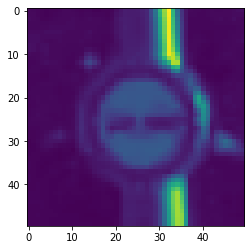

9



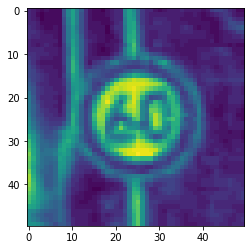

3



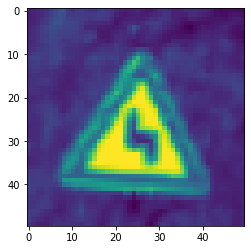

21



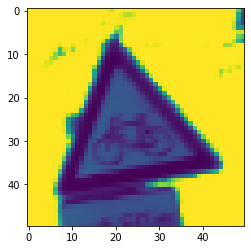

29



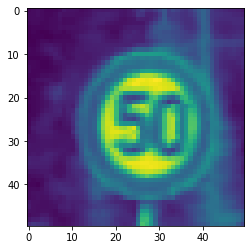

2



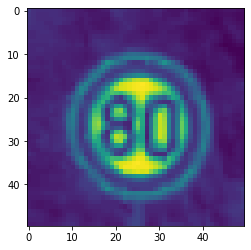

5



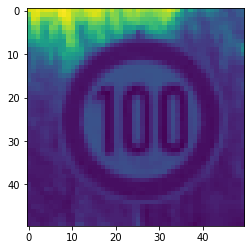

7



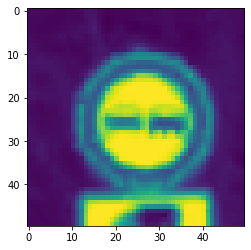

9



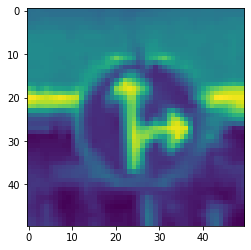

36



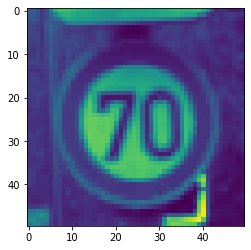

4



In [5]:
import random

random.shuffle(alle_daten)

insgesamt = 0

for element in alle_daten:
    if element[1] == 2:
        insgesamt += 1

print(insgesamt)
print(len(alle_daten))

training_data, test_data = split_test_training(alle_daten)

#for test purposes
#traing_data: [[img,class],[img,class],...,[img,class]] is all randomnly shuffled

for sample in training_data[:10]:
    plt.imshow(sample[0])
    plt.show()
    print(sample[1])
    
    print()

# Final Prep before training

(27446, 50, 50)
(27446, 50, 50, 1)
(27446, 50, 50, 1)


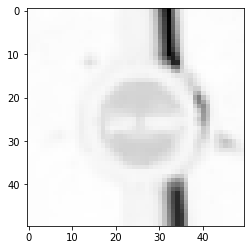

In [6]:
from tensorflow.keras.utils import to_categorical

X_test = []
Y_test = []
X_train = []
Y_train = []


for feature, label in training_data:
    X_train.append(feature)
    Y_train.append(label)
    
for feature, label in test_data:
    X_test.append(feature)
    Y_test.append(label)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
X_train = np.array(X_train).reshape(-1, resized, resized, 1)
Y_train = to_categorical(Y_train)
print(X_train.shape)

X_test = np.array(X_test).reshape(-1, resized, resized, 1)
Y_test = to_categorical(Y_test)


print(X_train.shape)
plt.imshow(X_train[0].reshape(resized,resized),cmap='Greys')
plt.show()

# Saving our data to hard drive

In [7]:
#Save everything, unnecessary in this case
#But could use pickle to load data in new script
#as the .pickle files are now in the Jupyter Projects folder

import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

# Loading our data from hard drive

In [8]:
import pickle
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

X_train = X_train/255.0

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

X_test = X_test/255.0

# Finally, our CNN

In [9]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

my_batch_size = 4
my_epochs = 10


model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5), activation = 'relu', input_shape = (resized,resized,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(43, activation = 'softmax'))
model.summary()
print()
print()

model.compile(optimizer='Adam',metrics = ['accuracy'], loss = 'categorical_crossentropy')
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= my_batch_size,verbose = 1,epochs = my_epochs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________

# Saving the model

In [10]:
from tensorflow.keras import models
model.save("GTSRB_CNN.h5")

# Reimporting the model so we don't have to execute all the code above (for the future)

In [11]:
from tensorflow.keras import models
model = models.load_model("GTSRB_CNN.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Verifying the model with unrelated data

# Preprocessing

In [12]:
def all_elements_sorted_num_test(eles):
    """
    Sorts the train_folder for GTSB Project
    """
    
    fehler = 0
    liste = []
    for i in range(len(eles) - 1): #one .DS_Store file - unnecessary
        liste.append(0)
    for element in eles:
        try:
            liste.insert(int(element[:-4]), element) #sort digits until .ppm
            liste.pop(int(element[:-4]) + 1)
        except:
            fehler += 1
            
    print("Fehler bei dem Laden: ", fehler)
        
    return liste

all_test_elements = all_elements_sorted_num_test(list_all_elements_in_folder(test_path))
#print(all_test_elements)

Fehler bei dem Laden:  1


# Dictionary to clearly be able to compare result with picture

In [13]:
mapping_dictionary = {}
map_liste = ['20 limit', '30 limit', '50 limit', '60 limit', '70 limit', '80 limit', 'no limit 80','100 limit',
            '120 limit', 'no overtaking, both cars', 'no overtaking left truck right car', 'right of way rocket',
            'right of way yellow and white', 'give way red and white', 'stop sign', 'limited access red and white circle', 
            'limited access red and white circle for trucks', 'do not pass red circle white bar',
            'attention triangle exclamation mark', 'attention triangle curve left', 'attention triangle curve right',
            'windy road ahead triangle', 'bumps ahead triangle', 'slippery road ahead triangle', 
            'narrow road triangle', 'construction triangle', 'attention traffic light', 'attention pedestrians',
            'attention child and parent running', 'attention bikes', 'attention snow', 'attention deer',
            'no limit white circle two grey bars', 'must turn right blue circle', 'must turn left blue circle',
            'must go straight blue circle', 'must go straight or right blue circle', 'must go straight or left blue circle',
            'must turn into here right blue circle', 'must turn into here left blue circle', 'roundabout',
            'no limit for no overtaking, both cars', 'no limit for no overtaking left truck right car']

#print(len(map_liste))

for i in range(len(map_liste)):
    mapping_dictionary.update({i: map_liste[i]})

#print(mapping_dictionary)

# Test

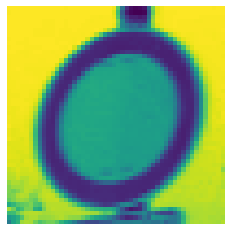

'limited access red and white circle'

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

index = random.randint(0, len(all_test_elements))
data = test_path + '/' + str(all_test_elements[index])

def prediction(model, data):
    img_array = cv2.imread(data ,cv2.IMREAD_GRAYSCALE) 
    img_array = cv2.resize(img_array, (50, 50))
    img_array = np.array(img_array).reshape(-1, 50, 50, 1)
    predict = model.predict(img_array)
    plt.imshow(img_array.reshape(50,50))
    plt.axis('off')
    plt.show()
    #print(predict)
    stelle = 0
    for i in np.nditer(predict):
        if i == 0:
            stelle += 1
        if i == 1:
            break
    return mapping_dictionary[stelle]

prediction(model,data)
